# Pymaceuticals Inc.
---

### Analysis

- Mince on the Capomulin and Ramicane treatments had the smallest average sized tumors 
- Mince on the Ketapril and Naftisol treatments had the highest average tumor sizes
- There is a positive relationship between mouse weight and average tumor size. Mice with a higher weight  are more likely to have a higher tumor volume. Correlation = 0.84
- The distribution of male and female mince is nearly even. (51% male, 49% female)
	

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice.
mouse_number = len(combined_data["Mouse ID"].unique())
mouse_number

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicated_id_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(combined_data[combined_data["Mouse ID"] == "g989"].index)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_number_clean = len(clean_data["Mouse ID"].unique())
mouse_number_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [13]:
#Display statistics summary
stats_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem,
    })

stats_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggr_stats = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

#Display summary table
aggr_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Create group of drugs and count of timepoints
timepoint_per_drug = clean_data.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)

timepoint_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

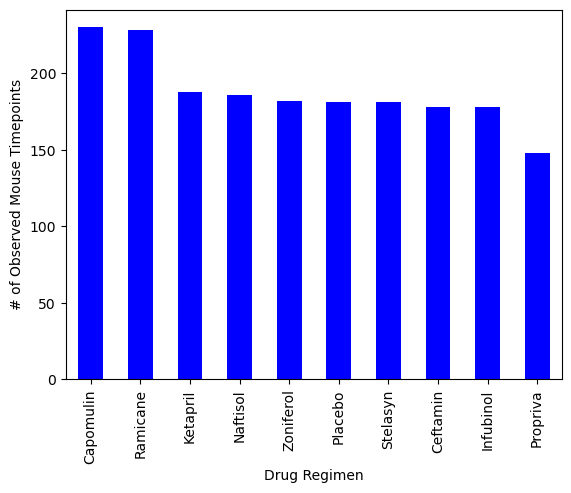

In [16]:
#Create pandas plot from group 
pandas_bar = timepoint_per_drug.plot(kind="bar", color="blue")
pandas_bar.set_ylabel("# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

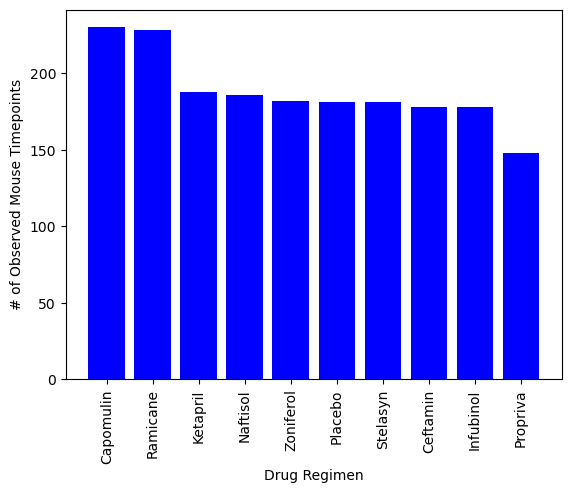

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#set x and y axis 
x_axis = timepoint_per_drug.index
y_axis = timepoint_per_drug.values

#plot chart using pyplot
plt.bar(x_axis, y_axis, color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Find gender split
sex_data = clean_data["Sex"].value_counts()
sex_data

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='Sex'>

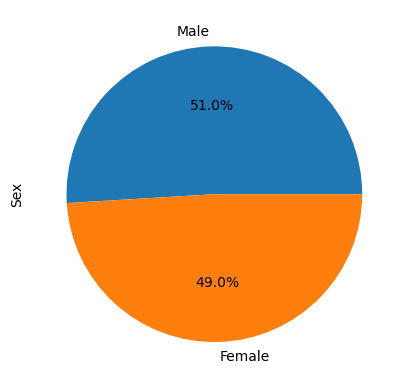

In [18]:
#Plot pie chart using pandas
sex_pie = sex_data.plot(kind="pie", autopct='%1.1f%%')
sex_pie.set_ylabel("Sex")
sex_pie


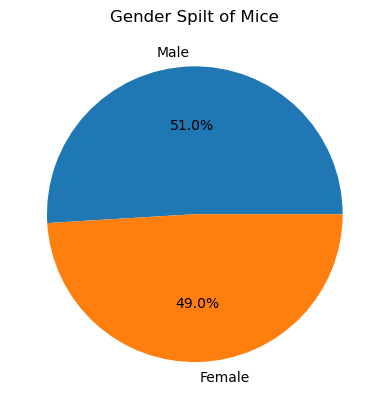

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plot using sex_data calc from before
plt.pie(sex_data, labels=sex_data.index, autopct="%1.1f%%")
plt.title("Gender Spilt of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()

last_timepoint


Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a262      Placebo         45
a275      Ceftamin        45
a366      Stelasyn        30
                          ..
z435      Propriva        10
z578      Ramicane        45
z581      Infubinol       45
z795      Naftisol        45
z969      Naftisol        45
Name: Timepoint, Length: 248, dtype: int64

In [52]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
drug_data = pd.merge(last_timepoint_df, clean_data, on=("Mouse ID","Drug Regimen", "Timepoint"), how = 'left')
drug_data

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    tumor_vol = drug_data.loc[drug_data["Drug Regimen"]== x]["Tumor Volume (mm3)"]
    tumor_data.append(tumor_vol)    

    # add subset quartiles, IQR, lower and upper bounds 
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outlier = tumor_vol.loc[(tumor_vol > upper_bound) | (tumor_vol < lower_bound)]
    
    print(f"{treatments} Outlier: {outlier}")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

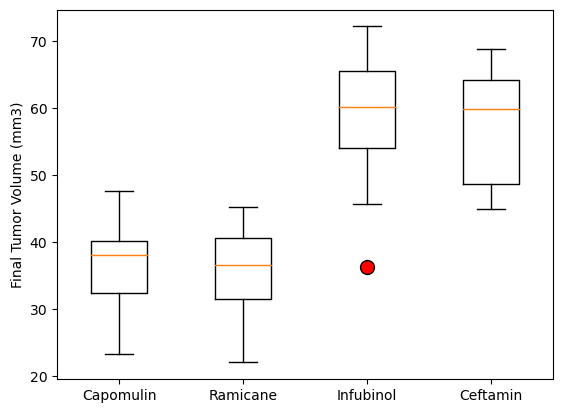

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

outlier_mark = dict(markerfacecolor="red", markersize =10)
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_data, flierprops = outlier_mark)
ax1.xaxis.set(ticks=range(1,len(treatments)+1), ticklabels = treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509"), :]
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

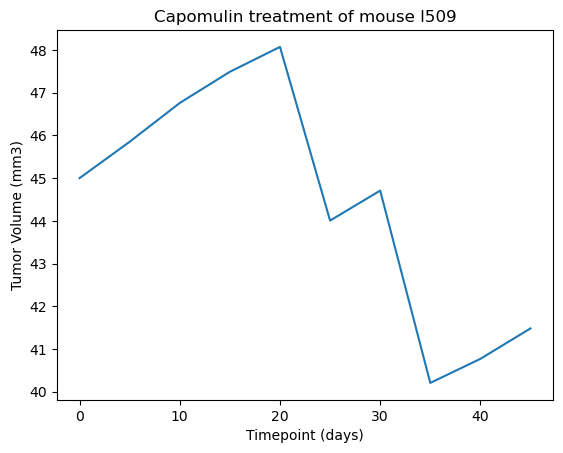

In [111]:
#plot line 
y_axis = mouse_data["Tumor Volume (mm3)"]
x_axis = mouse_data["Timepoint"]
plt.plot(x_axis, y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")

In [130]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data2 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
mouse_data2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


Text(0, 0.5, 'Average Tumor Volume (mmm3)')

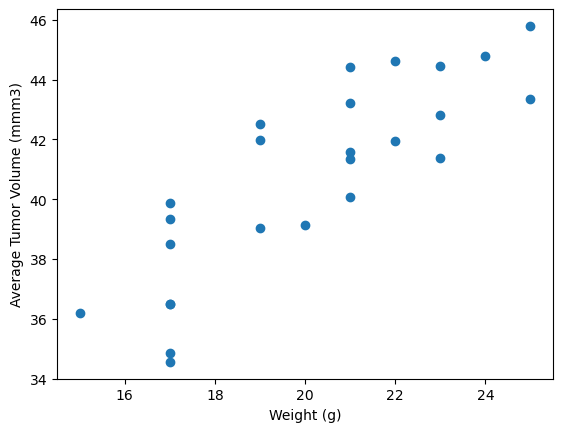

In [142]:
#plot scatter
y_axis = mouse_data2.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
x_axis = mouse_data2.groupby(["Mouse ID"])["Weight (g)"].mean()
plt.scatter(x_axis, y_axis,)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mmm3)")




## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mmm3)')

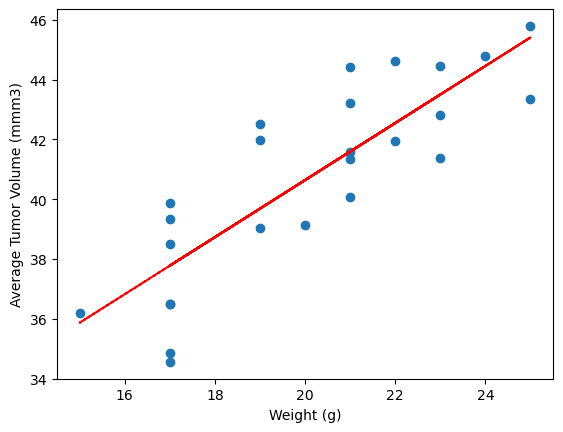

In [151]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Correlation coefficient
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis, y_axis)[0],2)}")

#Linear regression
y_axis = mouse_data2.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
x_axis = mouse_data2.groupby(["Mouse ID"])["Weight (g)"].mean()

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis, y_axis)
pe_fit = pe_slope * x_axis + pe_int

plt.scatter(x_axis, y_axis,)
plt.plot(x_axis,pe_fit,"--", color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mmm3)")


